In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None)
data

0       1     2    3    4   5    6    7    8     9   10
0    65  Female   0.7  0.1  187  16   18  6.8  3.3  0.90   1
1    62    Male  10.9  5.5  699  64  100  7.5  3.2  0.74   1
2    62    Male   7.3  4.1  490  60   68  7.0  3.3  0.89   1
3    58    Male   1.0  0.4  182  14   20  6.8  3.4  1.00   1
4    72    Male   3.9  2.0  195  27   59  7.3  2.4  0.40   1
..   ..     ...   ...  ...  ...  ..  ...  ...  ...   ...  ..
578  60    Male   0.5  0.1  500  20   34  5.9  1.6  0.37   2
579  40    Male   0.6  0.1   98  35   31  6.0  3.2  1.10   1
580  52    Male   0.8  0.2  245  48   49  6.4  3.2  1.00   1
581  31    Male   1.3  0.5  184  29   32  6.8  3.4  1.00   1
582  38    Male   1.0  0.3  216  21   24  7.3  4.4  1.50   2

[583 rows x 11 columns]

In [ ]:
data.columns=['age','gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alanine_Aminotransferase','Aspartate_Aminotransferase',
            'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','outcome']
data.head()

age  gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  outcome  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Text(0, 0.5, 'Frequency')

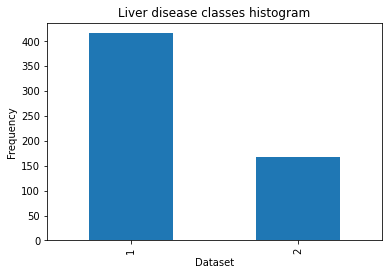

In [ ]:
count_classes = pd.value_counts(data['outcome'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

In [ ]:
data['outcome'] = data['outcome'].map({2:0,1:1}) 

In [ ]:
data['outcome'].value_counts()

1    416
0    167
Name: outcome, dtype: int64

In [ ]:
data.isnull().sum()

age                           0
gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
outcome                       0
dtype: int64

In [ ]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

age  gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  outcome  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        0  
312      4.8                         NaN        0

In [ ]:
data=data.dropna()
data['outcome']=1 - data['outcome']

LabelEncoder = LabelEncoder()
data['is_male']=LabelEncoder.fit_transform(data['gender'])
data = data.drop(columns='gender')
data

<ipython-input-10-554e12f3c068>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['outcome']=1 - data['outcome']
<ipython-input-10-554e12f3c068>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_male']=LabelEncoder.fit_transform(data['gender'])


age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  outcome  is_male  
0        3.3                        0.90        0        0  
1        3.2                        0.74        0        1  
2        3.3                        0.89        0        1  
3        3.4                        1.00        0        1  
4        2.4                        0.40        0        1  
..       ...                         ...      ...      ...  
578      1.6                        0.37        1        1  
579      3.2                        1.10        0        1  
580      3.2                        1.00        0        1  
581      3.4                        1.00        0        1  
582      4.4                        1.50        1        1  

[579 rows x 11 columns]

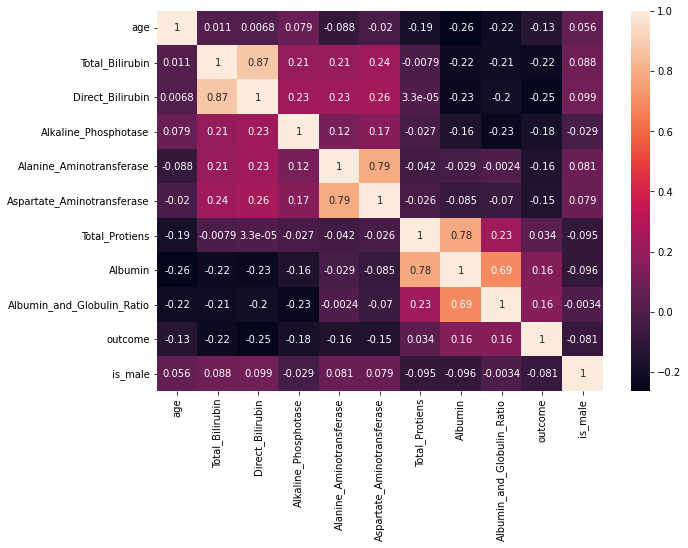

In [ ]:
plt.figure(figsize=(10,7))

sns.heatmap(data.corr(),annot=True)

In [ ]:
X=data.drop(['outcome'],axis=1)
y=data.outcome
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
X_scaler = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaler,y, test_size=0.2,  random_state=11)


print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (463, 10)
Test Shape: (116, 10)


In [ ]:
def clasification_result(a,b):
  cm = metrics.confusion_matrix(a, b)
  TP = cm[0,0]
  FP = cm[0,1]
  FN = cm[1,0]
  TN = cm[1,1]
  ACCURACY = (TP + TN) / float(TP + TN + FP + FN)
  TPR = TP / float(TP+FN)
  FPR = FP / float(FP+TN)
  RECALL = TP / float(TP + FN)
  precision = TP / float(TP + FP)

  print('accuracy : {0:0.2f}'.format(ACCURACY))
  print('TPR = {0:0.3f}'. format(TPR))
  print('FPR = {0:0.3f}'. format(FPR))
  print('Recall or Sensitivity : {0:0.3f}'.format(RECALL))
  print('Precision : {0:0.3f}'.format(precision))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict=knn.predict(X_test)
y_pred_knn=knn.predict(X_test)

knn_accuracy=metrics.accuracy_score(y_test,y_pred_knn)
knn_accuracy

0.7155172413793104

In [ ]:
print(metrics.classification_report(y_test,y_pred_knn))
clasification_result(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        84
           1       0.48      0.31      0.38        32

    accuracy                           0.72       116
   macro avg       0.62      0.59      0.60       116
weighted avg       0.69      0.72      0.69       116

accuracy : 0.72
TPR = 0.768
FPR = 0.524
Recall or Sensitivity : 0.768
Precision : 0.869


In [ ]:
# Naives Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

nb_accuracy=metrics.accuracy_score(y_test,y_pred_nb)
nb_accuracy

0.6120689655172413

In [ ]:
print(metrics.classification_report(y_test,y_pred_nb))
clasification_result(y_test, y_pred_nb)

              precision    recall  f1-score   support

           0       0.95      0.49      0.65        84
           1       0.41      0.94      0.57        32

    accuracy                           0.61       116
   macro avg       0.68      0.71      0.61       116
weighted avg       0.80      0.61      0.63       116

accuracy : 0.61
TPR = 0.953
FPR = 0.589
Recall or Sensitivity : 0.953
Precision : 0.488


In [ ]:
from sklearn.svm import SVC
svm= SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
svm_accuracy=metrics.accuracy_score(y_test,y_pred_svm)
svm_accuracy

0.7241379310344828

In [ ]:
print(metrics.classification_report(y_test,y_pred_svm))
clasification_result(y_test, y_pred_svm)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        84
           1       0.00      0.00      0.00        32

    accuracy                           0.72       116
   macro avg       0.36      0.50      0.42       116
weighted avg       0.52      0.72      0.61       116

accuracy : 0.72
TPR = 0.724
FPR = nan
Recall or Sensitivity : 0.724
Precision : 1.000


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-13-06e8fb32d787>:9: RuntimeWarning: invalid value en

In [ ]:
results= [['KNN Classifier', knn_accuracy],['GaussianNB',nb_accuracy],['SVM',svm_accuracy]]

Liverpatient_predi= pd.DataFrame(results, columns = ['classification models', 'accuracy_score'])
Liverpatient_predi

classification models  accuracy_score
0        KNN Classifier        0.715517
1            GaussianNB        0.612069
2                   SVM        0.724138

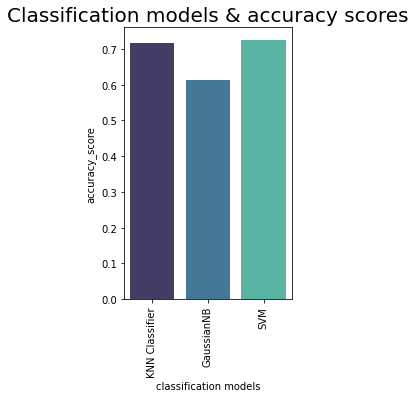

In [ ]:
plt.figure(figsize=(3,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores',fontsize=20)
sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_predi,palette = "mako")

# As this dataset is imabalanced using SMOTE to Balance the data.

In [ ]:
#Imbalance Data Use Smote

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaler,y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
y_train.value_counts()

0    341
1    122
Name: outcome, dtype: int64

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

1    341
0    341
Name: outcome, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_smote=KNeighborsClassifier(n_neighbors = 7)  
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test)
knn_smote_accuracy=(metrics.accuracy_score(y_test, y_pred_knn_smote))
knn_smote_accuracy

0.6293103448275862

In [ ]:
print(metrics.classification_report(y_test, y_pred_knn_smote))
clasification_result(y_test, y_pred_knn_smote)

              precision    recall  f1-score   support

           0       0.74      0.63      0.68        73
           1       0.50      0.63      0.56        43

    accuracy                           0.63       116
   macro avg       0.62      0.63      0.62       116
weighted avg       0.65      0.63      0.64       116

accuracy : 0.63
TPR = 0.742
FPR = 0.500
Recall or Sensitivity : 0.742
Precision : 0.630


In [ ]:
# Naives Bayes
from sklearn.naive_bayes import GaussianNB
nb_smote = GaussianNB()
nb_smote.fit(X_train_smote, y_train_smote)
y_pred_nb_smote = nb_smote.predict(X_test)

nb_smote_accuracy=metrics.accuracy_score(y_test,y_pred_nb_smote)
nb_smote_accuracy

0.6551724137931034

In [ ]:
print(metrics.classification_report(y_test, y_pred_nb_smote))
clasification_result(y_test, y_pred_nb_smote)

              precision    recall  f1-score   support

           0       0.87      0.53      0.66        73
           1       0.52      0.86      0.65        43

    accuracy                           0.66       116
   macro avg       0.69      0.70      0.66       116
weighted avg       0.74      0.66      0.66       116

accuracy : 0.66
TPR = 0.867
FPR = 0.479
Recall or Sensitivity : 0.867
Precision : 0.534


In [ ]:
from sklearn.svm import SVC
svm_smote= SVC(kernel='linear')
svm_smote.fit(X_train_smote,y_train_smote)
y_pred_svm_smote=svm_smote.predict(X_test)
svm_smote_accuracy=metrics.accuracy_score(y_test,y_pred_svm_smote)
svm_smote_accuracy

0.49137931034482757

In [ ]:
print(metrics.classification_report(y_test, y_pred_svm_smote))
clasification_result(y_test, y_pred_svm_smote)

              precision    recall  f1-score   support

           0       0.85      0.23      0.37        73
           1       0.42      0.93      0.58        43

    accuracy                           0.49       116
   macro avg       0.63      0.58      0.47       116
weighted avg       0.69      0.49      0.44       116

accuracy : 0.49
TPR = 0.850
FPR = 0.583
Recall or Sensitivity : 0.850
Precision : 0.233


In [ ]:
acc_smote= [['KNN Classifier', knn_smote_accuracy],['GaussianNB',nb_smote_accuracy],['SVM',svm_smote_accuracy]]

Liverpatient_pred= pd.DataFrame(acc_smote, columns = ['classification models', 'accuracy_score'])
Liverpatient_pred

classification models  accuracy_score
0        KNN Classifier        0.629310
1            GaussianNB        0.655172
2                   SVM        0.491379

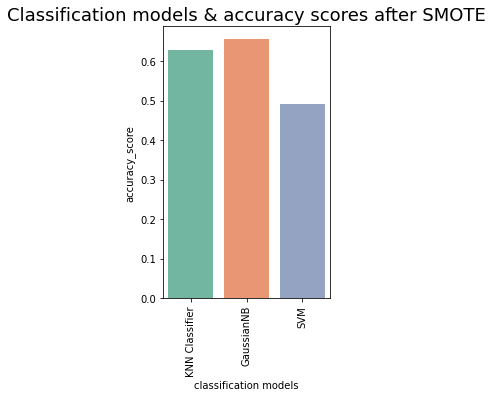

In [ ]:
plt.figure(figsize=(3,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_pred,palette ="Set2")